In [1]:
#importar librerias
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
DatosSE038_D1 = open('Prueba 23 02 @15_11 SE038.txt')
DatosSE038_D2 = open('Prueba 24 02 @15_43_ SE038.txt')
DatosSE039_D1 = open('Rotor SE039.txt')

In [4]:
DatosSE038_D1r = DatosSE038_D1.readlines()
DatosSE038_D2r = DatosSE038_D2.readlines()
DatosSE039_D1r = DatosSE039_D1.readlines()

In [5]:
DatosSE038_D1r.pop(0)
DatosSE038_D2r.pop(0)
DatosSE039_D1r.pop(0)

' Vel V  |   Direccion |   V    |   I     |   P    |  RPM   |  Hora   |  Fecha  \n'

In [6]:
def formato(x):
    x1 = np.array(x)
    x2 = pd.Series(x1)
    x3 = x2.apply(separar)
    return x3

In [7]:
def separar(x):
    return x.split()

In [8]:
def anum(x):
    res = [float(ele) for ele in x] 
    return res

In [9]:
DatosSE038_D1S = formato(DatosSE038_D1r)
DatosSE038_D2S = formato(DatosSE038_D2r)
DatosSE039_D1S = formato(DatosSE039_D1r)

In [22]:
def Cons_DF(DN):
    A = 0.25*0.5
    rho = 1.225 #1.225 --> paper de generación de calor con Sav y paper de Ortega. --- 0.3 Anterior.
    DatosT = pd.DataFrame(columns='V_V P VG Tsr CP'.split())
    Cont = 0
    for x in DN:
        if float(x[0]) != 0:
            DatosT.at[Cont,'V_V'] = float(x[0])
            DatosT.at[Cont,'P'] = (float(x[4]))*(0.001)
            DatosT.at[Cont,'VG'] = float(x[5])
            DatosT.at[Cont,'Tsr'] = ((float(x[5])*0.1047197)*0.5)/(float(x[0])*2)
            DatosT.at[Cont,'CP'] = float(x[4])*0.001/(0.5*rho*A*(float(x[0])**float(3)))
            if float(x[5]) == 0:
                DatosT.at[Cont,'Tr'] = 0
            else:
                DatosT.at[Cont,'Tr'] = (float(x[4]))*(0.001)/((float(x[5])*0.1047197))
            Cont = Cont + 1
    return DatosT

In [23]:
DatosSE038_D1DF = Cons_DF(DatosSE038_D1S) 
DatosSE038_D2DF = Cons_DF(DatosSE038_D2S)
DatosSE039_D1DF = Cons_DF(DatosSE039_D1S)

<AxesSubplot:>

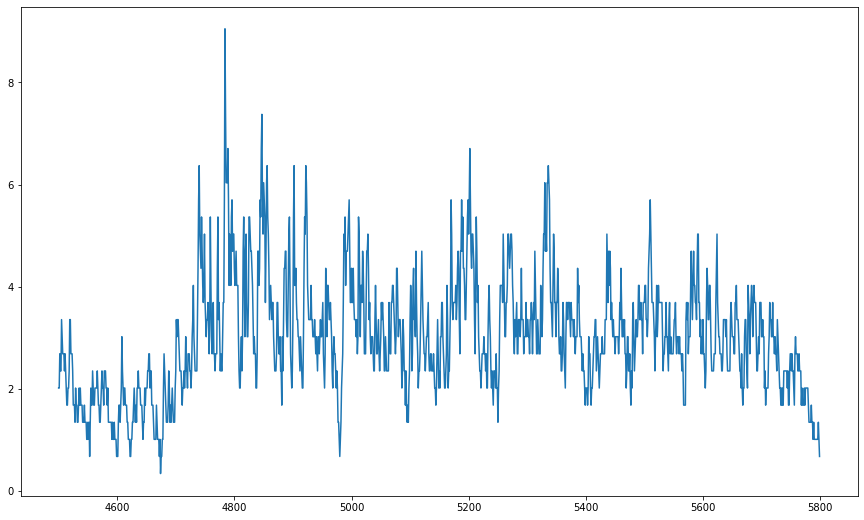

In [24]:
plt.figure(figsize=(15,9))
DatosSE039_D1DF['V_V'][4500:5800].plot()

<AxesSubplot:>

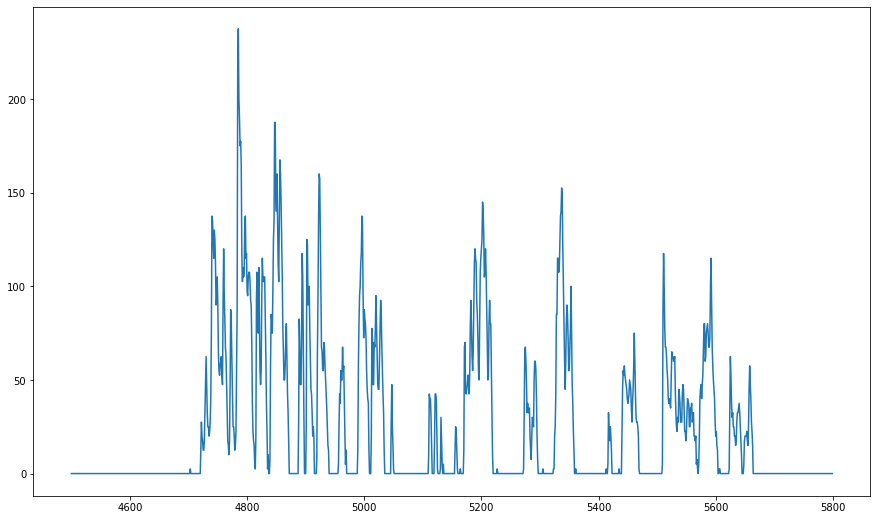

In [25]:
plt.figure(figsize=(15,9))
DatosSE039_D1DF['VG'][4500:5800].plot()

<AxesSubplot:>

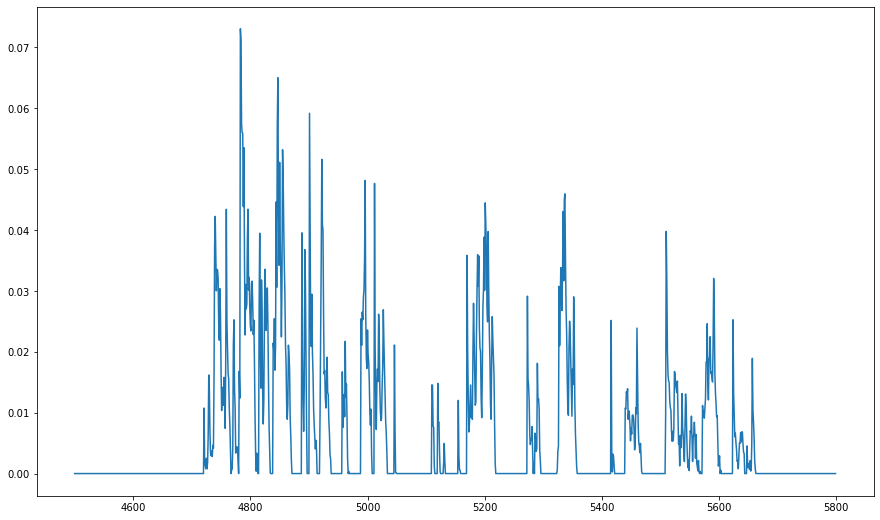

In [16]:
plt.figure(figsize=(15,9))
DatosSE039_D1DF['Tr'][4500:5800].plot()

<AxesSubplot:>

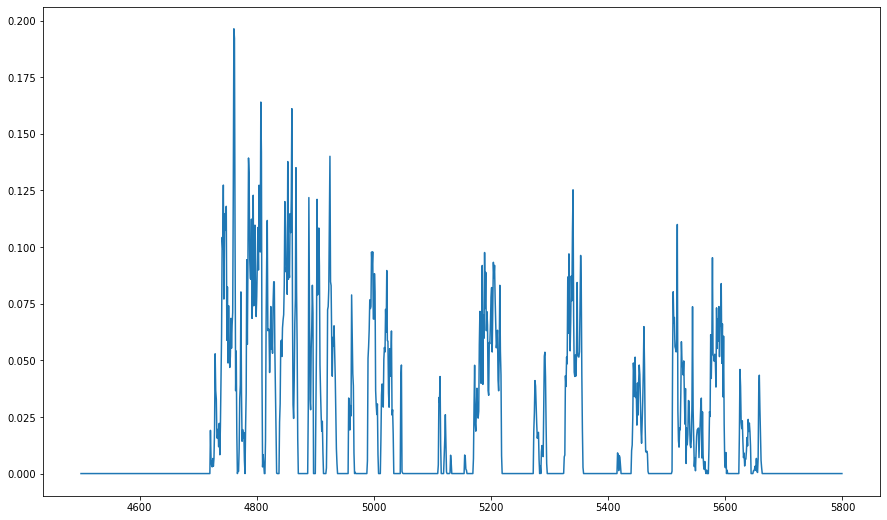

In [26]:
plt.figure(figsize=(15,9))
DatosSE039_D1DF['CP'][4500:5800].plot()

In [ ]:
from scipy.signal import savgol_filter
savgol_filter(DatosTrp['X'],51,6)

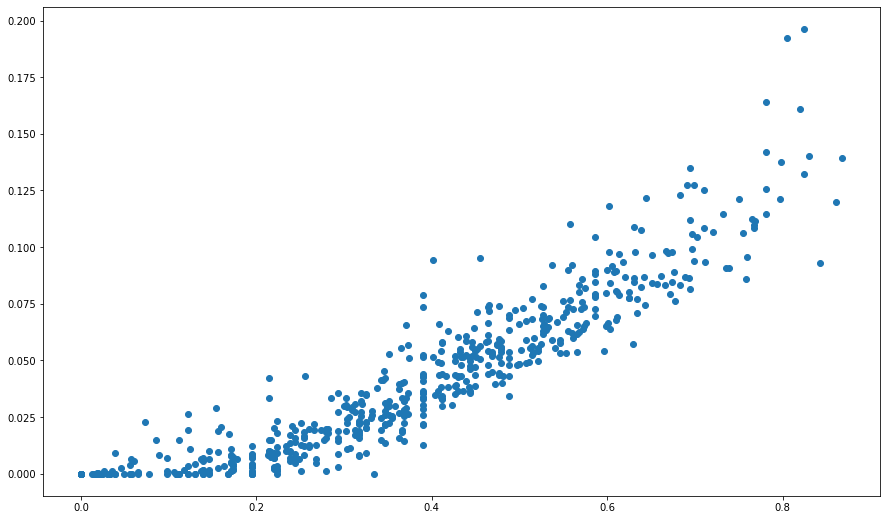

In [27]:
plt.figure(figsize=(15,9))
plt.scatter(DatosSE039_D1DF['Tsr'][4500:5800],DatosSE039_D1DF['CP'][4500:5800])

<AxesSubplot:>

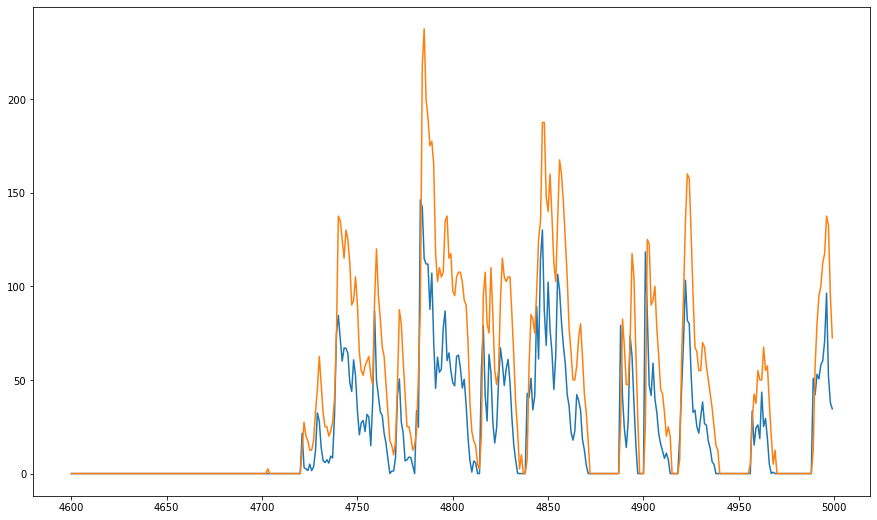

In [19]:
plt.figure(figsize=(15,9))
(DatosSE039_D1DF['Tr'][4600:5000]*2000).plot()
DatosSE039_D1DF['VG'][4600:5000].plot()

<AxesSubplot:>

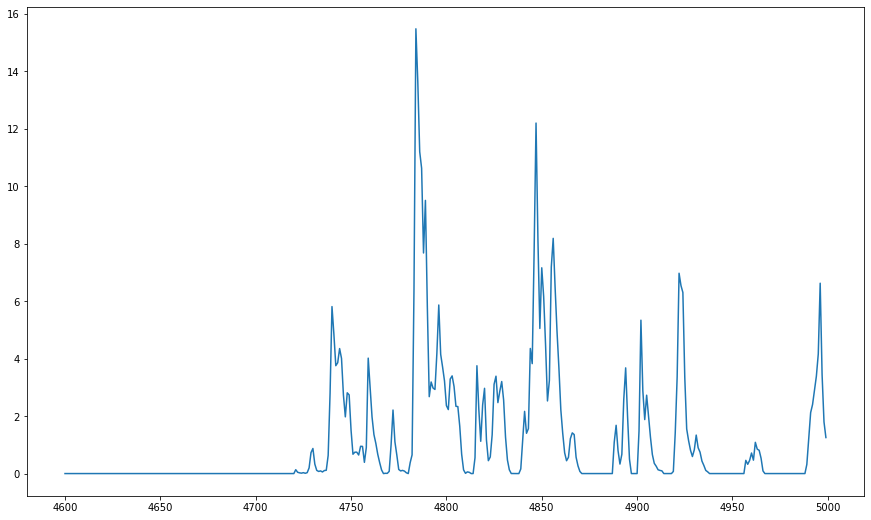

In [20]:
plt.figure(figsize=(15,9))
(DatosSE039_D1DF['Tr'][4600:5000]*DatosSE039_D1DF['VG'][4600:5000]).plot()

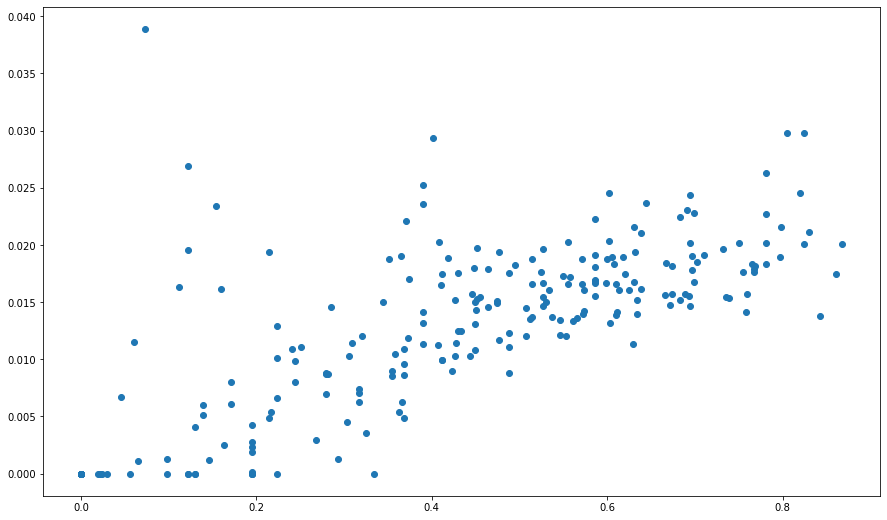

In [28]:
plt.figure(figsize=(15,9))
plt.scatter(DatosSE039_D1DF['Tsr'][4600:5000],(DatosSE039_D1DF['Tr'][4600:5000]/(0.25*1.225*0.5*(DatosSE039_D1DF['V_V'][4600:5000]**float(2)))))

<AxesSubplot:>

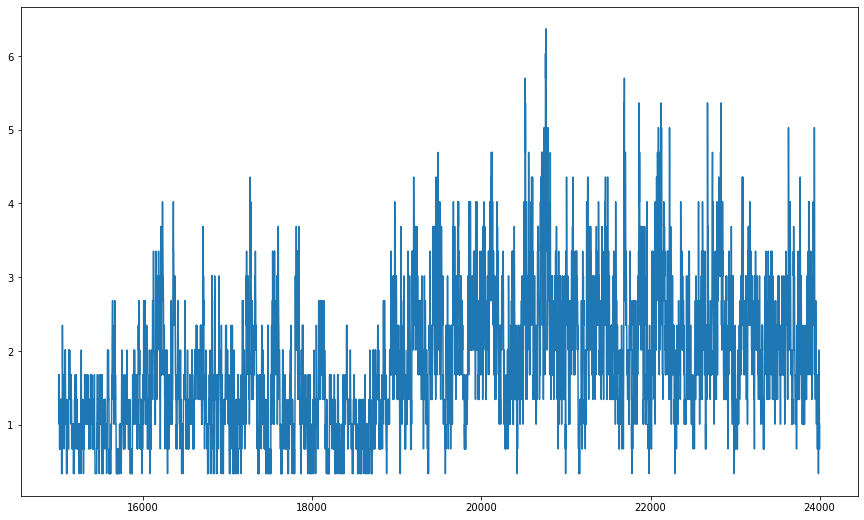

In [75]:
plt.figure(figsize=(15,9))
DatosSE039_D1DF['V_V'][15000:24000].plot()

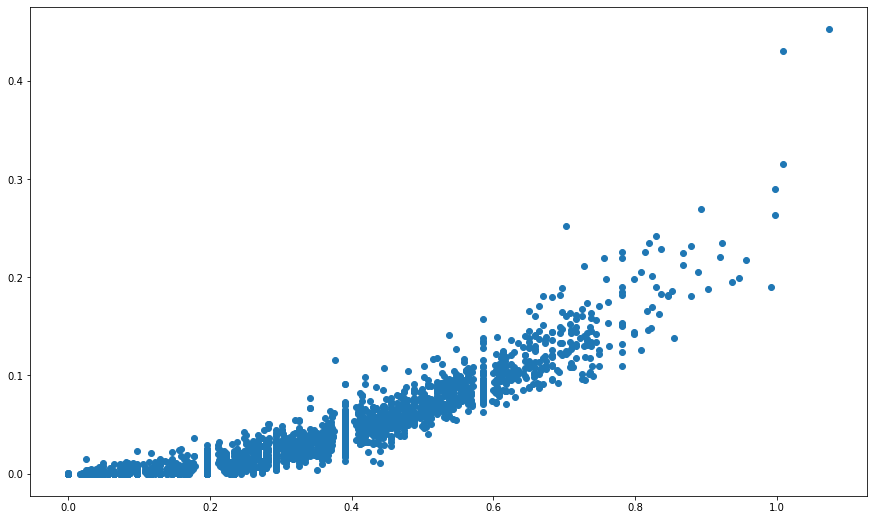

In [29]:
plt.figure(figsize=(15,9))
plt.scatter(DatosSE039_D1DF['Tsr'][15000:24000],DatosSE039_D1DF['CP'][15000:24000])

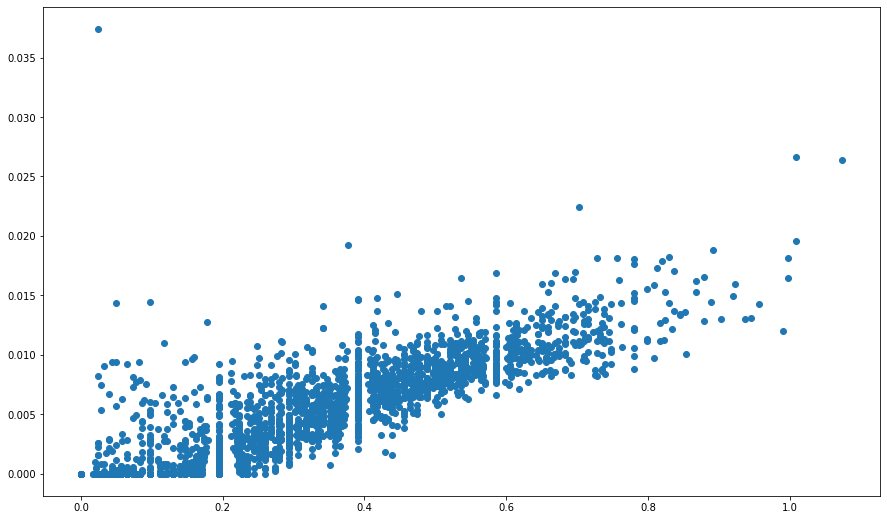

In [77]:
plt.figure(figsize=(15,9))
plt.scatter(DatosSE039_D1DF['Tsr'][15000:24000],(DatosSE039_D1DF['Tr'][15000:24000]/(0.25*1.225*0.5*(DatosSE039_D1DF['V_V'][15000:24000]**float(2)))))

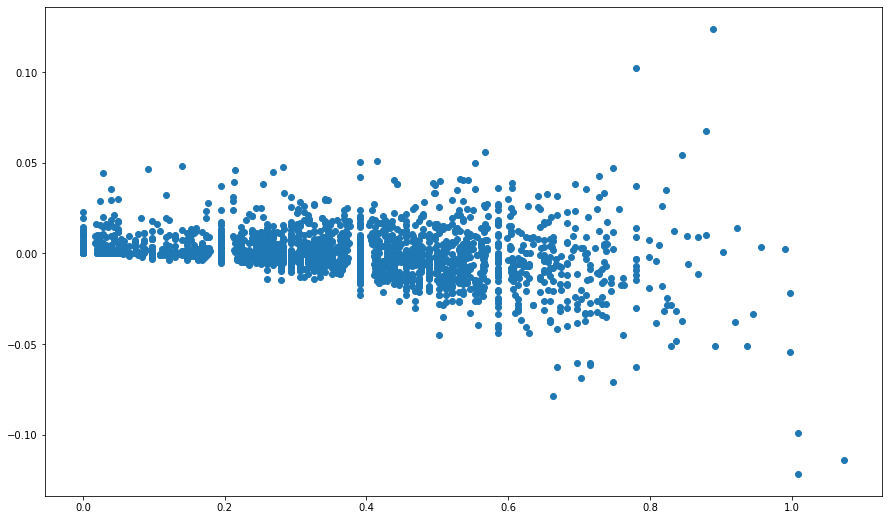

In [188]:
from scipy.signal import savgol_filter
plt.figure(figsize=(15,9))
plt.scatter(DatosSE039_D1DF['Tsr'][15000:24000],np.diff(DatosSE039_D1DF['CP'][15000:24001]))
#plt.plot(DatosSE039_D1DF['Tsr'][4600:5000],np.diff(DatosSE039_D1DF['CP'][4600:5001]),'r')

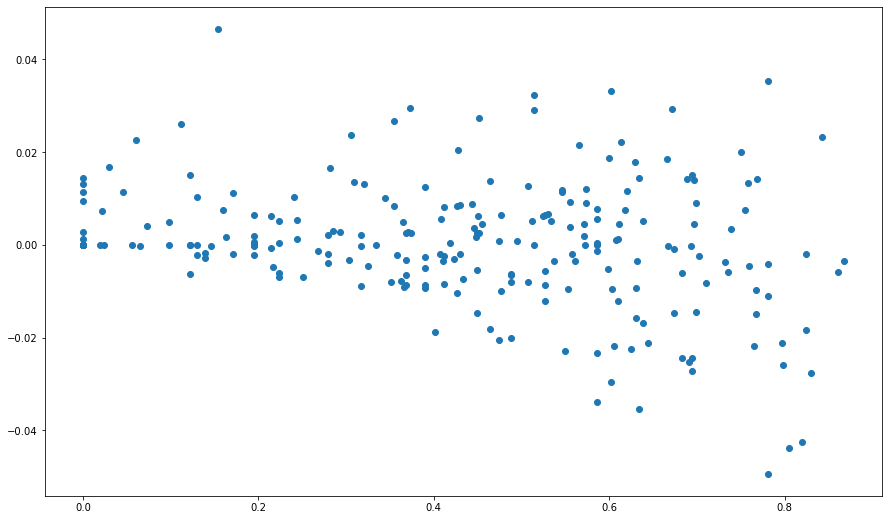

In [227]:
from scipy.signal import savgol_filter
plt.figure(figsize=(15,9))
plt.scatter(DatosSE039_D1DF['Tsr'][4600:5000],np.diff(DatosSE039_D1DF['CP'][4600:5001]))
#plt.plot(DatosSE039_D1DF['Tsr'][4600:5000],np.diff(DatosSE039_D1DF['CP'][4600:5001]),'r')

In [57]:
Top_Tsr = 0.71
bin_L = 0.03
TsrLs = np.arange(0,Top_Tsr,bin_L)
TsrLr = np.zeros(int(Top_Tsr/(bin_L))+1)
TsrAn = DatosSE039_D1DF['Tsr'][15000:24000]
CPAn = DatosSE039_D1DF['CP'][15000:24001]
cont = 0
for x in TsrLs:
    conttsr = 1
    Conty = 15000
    for y in TsrAn:
        if (y >= x-(bin_L/2)) and (y<x+(bin_L/2)):
            TsrLr[cont] = (TsrLr[cont] + CPAn[Conty])
            conttsr=conttsr+1
        Conty = Conty+1
    TsrLr[cont] = (TsrLr[cont])/conttsr
    cont = cont+1

In [50]:
Top_Tsr = 0.71
bin_L = 0.03
TsrLs = np.arange(0,Top_Tsr,bin_L)
TsrLr = np.zeros(int(Top_Tsr/(bin_L))+1)
TsrAn = DatosSE039_D1DF['Tsr'][15000:24000]
CPAn = DatosSE039_D1DF['CP'][15000:24001]
cont = 0
for x in TsrLs:
    conttsr = 1
    Conty = 15000
    for y in TsrAn:
        if (y >= x-(bin_L/2)) and (y<x+(bin_L/2)):
            if CPAn[Conty] > TsrLr[cont]:
                TsrLr[cont] = CPAn[Conty]
            conttsr=conttsr+1
        Conty = Conty+1
    #TsrLr[cont] = (TsrLr[cont])/conttsr
    cont = cont+1

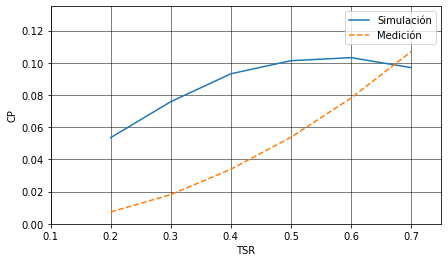

In [60]:
from scipy.signal import savgol_filter
DatosP = pd.DataFrame(columns='X'.split())
DatosP['X'] = savgol_filter(TsrLr,21,2)
#DatosP['X'] = TsrLr
#DatosP['X'].plot()
#DatosP['Y'].plot()

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7,4))
ax = fig.add_subplot(1, 1, 1)
plt.xlabel("TSR")
plt.ylabel("CP")
line, = ax.plot([0.2,0.3,0.4,0.5,0.6,0.7],D_ES039['CP'][0:6])
line.set_label('Simulación')
ax.legend()
line2, = ax.plot([0.2,0.3,0.4,0.5,0.6,0.7],[DatosP['X'][6],DatosP['X'][9],DatosP['X'][12],DatosP['X'][15],DatosP['X'][18],DatosP['X'][21]],linestyle='dashed')
line2.set_label('Medición')
ax.legend()
ax.set_xlim([0.1, 0.75])
ax.set_ylim([0.0, 0.135])
plt.grid(b=True, axis='both',color='k', linestyle='-', linewidth=0.5)
plt.show()

In [228]:
DatosSE039_D1DF['CT']=(DatosSE039_D1DF['Tr']/(0.25*1.225*0.5*(DatosSE039_D1DF['V_V']**float(2))))

In [293]:
DP=np.diff(DatosSE039_D1DF['P'])
len(DP)
DPT = np.ones(len(DP)+1)
cont = 0
for x in DP:
    DPT[cont] = DPT[cont]*x
    cont = cont+1
    if cont == len(DP):
        break
DPT

array([0., 0., 0., ..., 0., 0., 1.])

In [304]:
DatosSE039_D1DF['DP'] = DPT

DatosSE039_D1DF['DCP'] = (DatosSE039_D1DF['DP'].values)*0.001/(0.5*1.225*0.25*((DatosSE039_D1DF['V_V'].values)**float(3)))

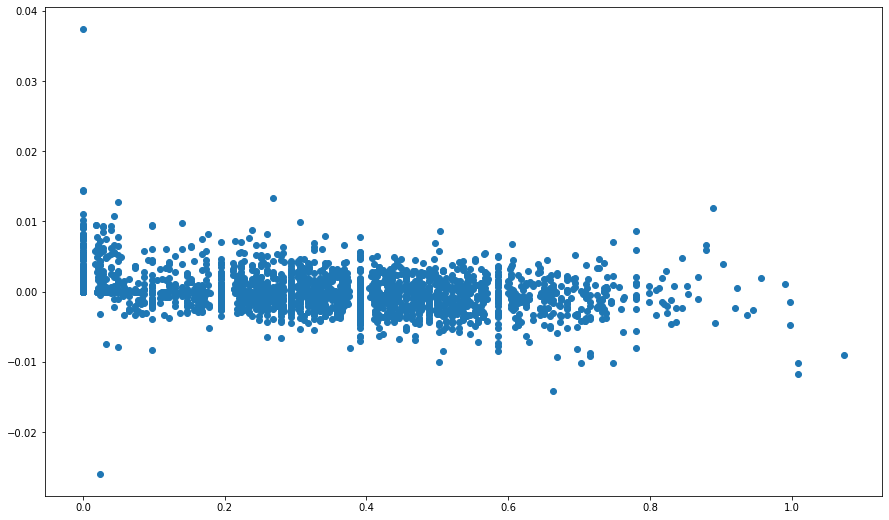

In [229]:
plt.figure(figsize=(15,9))
plt.scatter(DatosSE039_D1DF['Tsr'][15000:24000],np.diff(DatosSE039_D1DF['CT'][15000:24001]))

<AxesSubplot:>

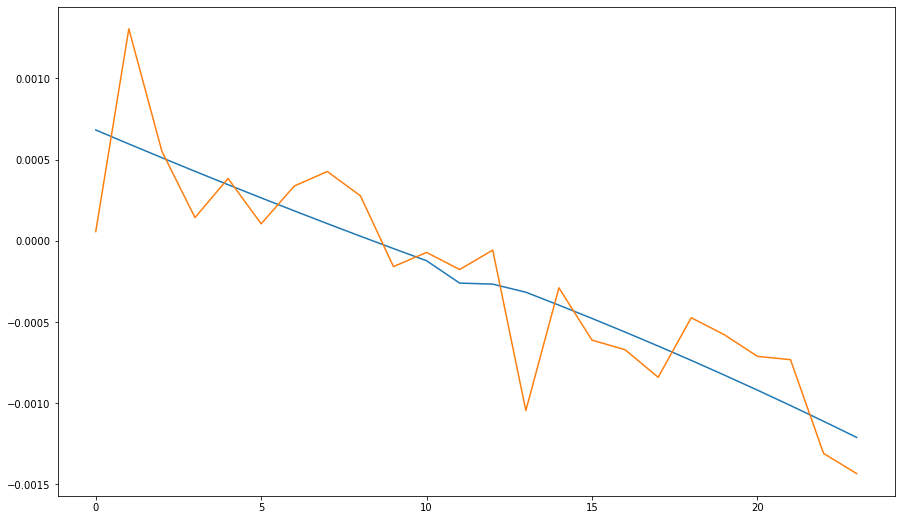

In [231]:
plt.figure(figsize=(15,9))
DatosP = pd.DataFrame(columns='X'.split())
DatosP['X'] = savgol_filter(TsrLr,21,2)
DatosP['Y'] = TsrLr
DatosP['X'].plot()
DatosP['Y'].plot()

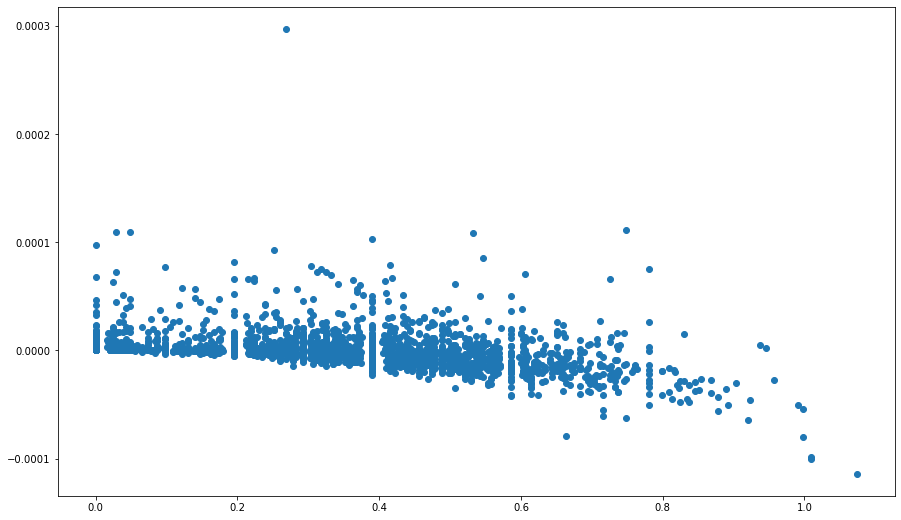

In [305]:
plt.figure(figsize=(15,9))
plt.scatter(DatosSE039_D1DF['Tsr'][15000:24000],DatosSE039_D1DF['DCP'][15000:24000])

In [31]:
D_ES038 = pd.read_csv('CPEs038.csv')
D_ES039 = pd.read_csv('CPEs039.csv')

In [176]:
Top_Tsr = 0.75
bin_L = 0.05
DatosBPSE039 = pd.DataFrame(columns='TSR CP'.split())
TsrLs = np.arange(0.2,Top_Tsr,bin_L)
TsrLr = np.zeros(int(Top_Tsr/(bin_L))+1)
TsrAn = DatosSE039_D1DF['Tsr'][15000:24000]
CPAn = DatosSE039_D1DF['CP'][15000:24000]
cont = 0
for x in TsrLs:
    Conty = 15000
    for y in TsrAn:
        if (y >= x-(bin_L/2)) and (y<x+(bin_L/2)):
            DatosBPSE039.at[Conty-15000,'TSR'] = x
            DatosBPSE039.at[Conty-15000,'CP'] = CPAn[Conty]
        Conty = Conty+1
#    TsrLr[cont] = (TsrLr[cont])/conttsr
    cont = cont+1

TypeError: cannot unpack non-iterable AxesSubplot object

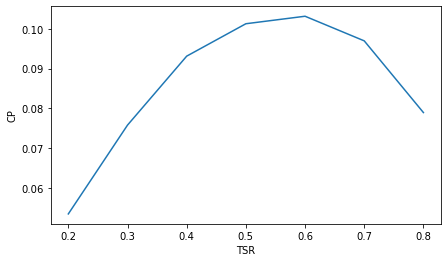

In [108]:
import seaborn as sns
 



import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7,4))
ax = fig.add_subplot(1, 1, 1)
plt.xlabel("TSR")
plt.ylabel("CP")
line, = sns.lineplot(data = D_ES039, x='TSR', y='CP' )
line.set_label('Simulación')
ax.legend()
line2, = sns.boxplot(data = DatosBPSE039, x = 'TSR' , y = 'CP')
line2.set_label('Medición')
ax.legend()
ax.set_xlim([0.1, 0.75])
ax.set_ylim([0.0, 0.135])
plt.grid(b=True, axis='both',color='k', linestyle='-', linewidth=0.5)
plt.show()

In [97]:
np.concatenate((DatosBPSE039['TSR'].values).reshape(-1,1), (DatosBPSE039['CP'].values).reshape(-1,1))

TypeError: only integer scalar arrays can be converted to a scalar index

In [105]:
(DatosBPSE039[['TSR','CP']].values).reshape(2,-1)

array([[0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, ..., 0.12703984792940326, 0.55,
        0.08820541725609693]], dtype=object)

In [102]:
np.array([1,2,3],[3,5,5,5])

TypeError: Field elements must be 2- or 3-tuples, got '3'

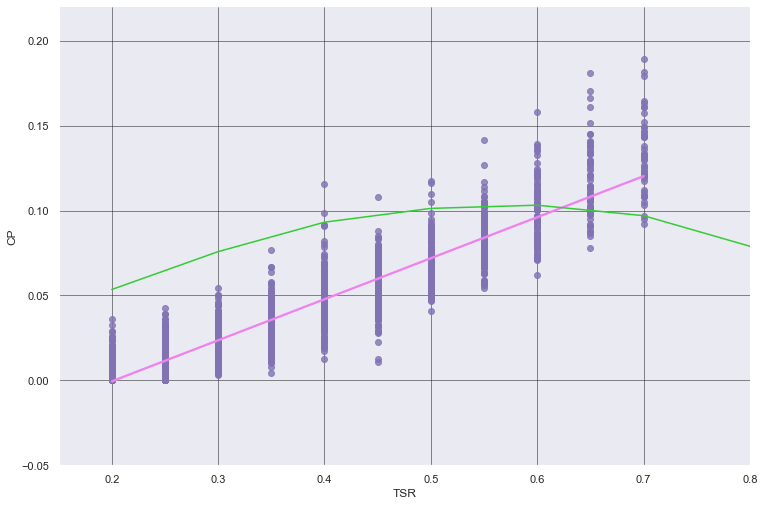

In [219]:
DatosBPSE039['CP']=pd.to_numeric(DatosBPSE039['CP'], errors ='ignore')
DatosBPSE039['TSR']=pd.to_numeric(DatosBPSE039['TSR'], errors ='ignore')
import matplotlib.pyplot as plt
#fig = plt.figure(figsize=(7,4))
#ax = fig.add_subplot(1, 1, 1)
sns.color_palette("hls", 8)
#sns.set(rc={"figure.figsize":(10, 10)})
sns.lmplot(data = DatosBPSE039, x='TSR', y='CP',height=7,aspect=1.5,ci =50,markers='o',scatter_kws={"color": "m"}, line_kws={"color": "violet"})
sns.lineplot(data = D_ES039, x='TSR', y='CP',color="limegreen",legend=True)

plt.xlim(0.15, 0.8)
plt.ylim(-0.05, 0.22)
plt.grid(b=True, axis='both',color='k', linestyle='-', linewidth=0.5)
plt.show()